In [71]:
from helpers import load_data #Selfmade file for loading data in correct format
# import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
# import seaborn
# import torch
# import pyreadr
# import requests
# import urllib.request
# import math
import pandas as pd 
# import random
import numpy as np
# from sklearn.datasets import load_iris 
# from scipy.ndimage import gaussian_filter
# from sklearn import preprocessing
# from sklearn import utils
import seaborn as sns
from sklearn.impute import KNNImputer

    
import statistics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import svm
# from torchvision import datasets, transforms
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

In [72]:
#Load modified plant 2 datasets
P2=pd.read_csv('archive/Plant2_summed_dataset.csv',na_values= '?')
# display(P2)

P2 = P2[['DATE_TIME', 'AC_POWER','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']]
display(P2)


,DATE_TIME,AC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,0.0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,0.0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,0.0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,0.0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,0.0,26.596148,25.088210,0.0
...,...,...,...,...,...
3254,2020-06-17 22:45:00,0.0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,0.0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,0.0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,0.0,23.291048,22.373909,0.0


c:\Users\andir\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,DATE_TIME,AC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,0.0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,0.0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,0.0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,0.0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,0.0,26.596148,25.088210,0.0
...,...,...,...,...,...
3254,2020-06-17 22:45:00,0.0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,0.0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,0.0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,0.0,23.291048,22.373909,0.0


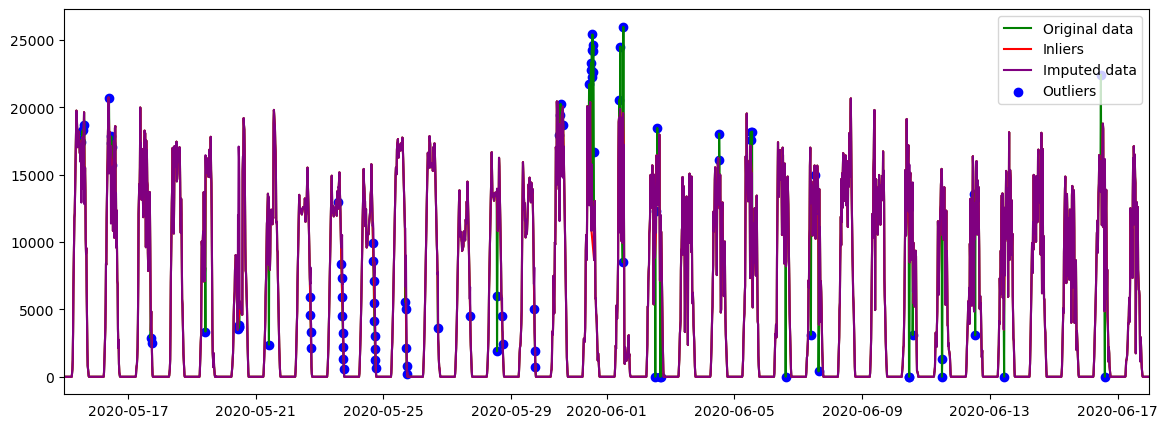

,0,1,2
0,-0.262165,-0.679899,-0.744412
1,-0.292689,-0.736230,-0.744412
2,-0.341632,-0.735752,-0.744412
3,-0.386318,-0.736335,-0.744412
4,-0.362787,-0.677482,-0.744412
...,...,...,...
2678,-1.226152,-0.979539,-0.744412
2679,-1.229346,-0.983009,-0.744412
2680,-1.232945,-0.978949,-0.744412
2681,-1.248742,-0.980554,-0.744412


In [79]:
# feature_names=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
# # feature_names=['DATE_TIME', 'AC_POWER','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']
# X = P2[feature_names]
# y = P2['AC_POWER']


# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=6/34, shuffle=False)


# # See that the data is split properly in time. Can add "DATE_TIME" t ofeatures, to verify.
# display(X_train)
# display(X_test)


#OUTLIER DETECTION
P2_det=P2.copy()
anomaly_inputs=['AC_POWER','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']
#IN IsolationForest, adjust contamination [0-0,5], indicates the percentage of expected outliers.
#Use plot at the end of this code block to check if the outliers are actually identified
model_IF = IsolationForest(contamination=0.03, random_state=42)
model_IF.fit(P2_det[anomaly_inputs])
P2_det['anomaly_scores'] = model_IF.decision_function(P2_det[anomaly_inputs])
P2_det['anomaly'] = model_IF.predict(P2_det[anomaly_inputs])


#OUTLIER INDEXES
out_index=np.asarray(np.where(P2_det['anomaly']==-1)[0]).astype(int)
#INLIER INDEXES
in_index=np.asarray(np.where(P2_det['anomaly']==1)[0]).astype(int)

#MAKING COPY TO MAKE CHANGES TO
P2_imp=pd.DataFrame(P2.copy())

#REPLACING OUTLIERS WITH NaN
P2_imp.iloc[out_index,1]=np.nan
P2_imp['DATE_TIME']=pd.to_datetime(P2_imp['DATE_TIME'])

#SANITY CHECKS
display(P2_imp)# SHOW DATAFRAME


#KNN IMPUTATION
imputer = KNNImputer(n_neighbors=3)
P2_imp.iloc[:,1:]=imputer.fit_transform(P2_imp.iloc[:,1:])


#print('missing values:',P2_imp.isna().sum())


plt.figure(figsize=(14,5))
start, end= 0,(len(P2)-1)
plt.plot(pd.to_datetime(P2_det.iloc[:,0]),P2_det.iloc[:,1],color='green')#ORIGINAL DATA
plt.plot(pd.to_datetime(P2_det.iloc[in_index,0]),P2_det.iloc[in_index,1],color='red')#INLIERS
plt.plot(pd.to_datetime(P2_det.iloc[:,0]),P2_imp.iloc[:,1],color='purple')#IMPUTED DATA
plt.scatter(pd.to_datetime(P2_det.iloc[out_index,0]),P2_det.iloc[out_index,1],color='blue')#OUTLIERS
# plt.plot(pd.to_datetime(P2_det.iloc[:,0]),P2_det.iloc[:,1+3]*20000,color='orange')#For plotting Irradiation alongside
plt.xlim([pd.to_datetime(P2_det.iloc[start,0]),pd.to_datetime(P2_det.iloc[end,0])])
plt.legend(['Original data','Inliers','Imputed data','Outliers'])
# plt.legend(['Original data','Inliers','Imputed data','Outliers','Irradiation'])##For plotting Irradiation alongside
plt.show()

#USE THIS DATA INSTEAD IN THE REST OF THE CODE
feature_names=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
X_imp = P2_imp[feature_names]
y_imp = P2_imp['AC_POWER']
# scaler1=MinMaxScaler()
scaler1=StandardScaler()
scaler1.fit(X_imp)
X_imp=pd.DataFrame(scaler1.transform(X_imp))
# X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imp, y_imp, test_size=6/34, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X_imp, y_imp, test_size=6/34, shuffle=False)
# display(P2_imp)
display(X_train)


#Data can be converted to Dataframe again



In [70]:
# # Example on TimeSeriesSplit. Later realized that n_splits=7 seperates dat ainto 8 blocks, and not 7 blocks.
# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
# y = np.array([1, 2, 3, 4])
# tscv = TimeSeriesSplit(n_splits=3)
# print(tscv)  
# # TimeSeriesSplit(max_train_size=None, n_splits=3)
# for train_index, test_index in tscv.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     # print(X_train)
#     # print(y_train)
# # TRAIN: [0] TEST: [1]
# # TRAIN: [0 1] TEST: [2]
# # TRAIN: [0 1 2] TEST: [3]

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


In [75]:
# Make a Decision Tree Regressor
dtr = DecisionTreeRegressor(min_impurity_decrease=0.0, max_depth=None,  random_state=42)
dtr.fit(X_train,y_train)

dtr_score = dtr.score(X_test, y_test)
print(f"Score is {dtr_score*100:.4f} %")

# # Plot decision tree
# plt.figure(figsize=(10, 3), dpi=300)
# tree_dot = plot_tree(dtr, feature_names=feature_names) # Takes >2min to plot (when not limited)

# Make TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=7)

# Test GridSearchCV
param_grid = {'min_impurity_decrease': range(0, 15), 'max_depth': range(2, 10), } 
dtr2 = DecisionTreeRegressor(random_state=42)
grid = GridSearchCV(dtr2, param_grid=param_grid, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))


dtr2_score = grid.score(X_train, y_train)
print(f"Train score is {dtr2_score*100:.4f} %")

dtr2_score = grid.score(X_test, y_test)
print(f"Test score is {dtr2_score*100:.4f} %")


Score is 86.0351 %
{'max_depth': 3, 'min_impurity_decrease': 0}
0.9213863075654235
Train score is 93.6571 %
Test score is 92.1386 %


In [67]:
results = pd.DataFrame(grid.cv_results_)
display(results)

display(results[['params','mean_test_score','mean_train_score']])


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_impurity_decrease,params,split0_test_score,split1_test_score,split2_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.004156,0.000685,0.002161,0.000371,2,0,"{'max_depth': 2, 'min_impurity_decrease': 0}",0.759936,0.933890,0.923490,...,0.064683,46,0.967490,0.908267,0.919167,0.920455,0.919816,0.923611,0.926468,0.018956
1,0.005555,0.001159,0.003426,0.000907,2,1,"{'max_depth': 2, 'min_impurity_decrease': 1}",0.759936,0.933890,0.923490,...,0.064683,46,0.967490,0.908267,0.919167,0.920455,0.919816,0.923611,0.926468,0.018956
2,0.004333,0.000716,0.002451,0.000465,2,2,"{'max_depth': 2, 'min_impurity_decrease': 2}",0.759936,0.933890,0.923490,...,0.064683,46,0.967490,0.908267,0.919167,0.920455,0.919816,0.923611,0.926468,0.018956
3,0.004321,0.000941,0.002660,0.000743,2,3,"{'max_depth': 2, 'min_impurity_decrease': 3}",0.759936,0.933890,0.923490,...,0.064683,46,0.967490,0.908267,0.919167,0.920455,0.919816,0.923611,0.926468,0.018956
4,0.003951,0.000796,0.002162,0.000688,2,4,"{'max_depth': 2, 'min_impurity_decrease': 4}",0.759936,0.933890,0.923490,...,0.064683,46,0.967490,0.908267,0.919167,0.920455,0.919816,0.923611,0.926468,0.018956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.006736,0.002247,0.002812,0.000917,9,10,"{'max_depth': 9, 'min_impurity_decrease': 10}",0.745340,0.882691,0.925032,...,0.061923,109,0.997542,0.979648,0.971484,0.968812,0.967008,0.963766,0.974710,0.011328
116,0.006822,0.001838,0.002580,0.000729,9,11,"{'max_depth': 9, 'min_impurity_decrease': 11}",0.745340,0.882745,0.925032,...,0.062059,107,0.997542,0.979648,0.971484,0.968812,0.967008,0.963766,0.974710,0.011328
117,0.005765,0.001012,0.002444,0.000461,9,12,"{'max_depth': 9, 'min_impurity_decrease': 12}",0.745340,0.881931,0.925036,...,0.061864,117,0.997542,0.979648,0.971484,0.968812,0.967008,0.963765,0.974710,0.011328
118,0.006351,0.002375,0.001861,0.000772,9,13,"{'max_depth': 9, 'min_impurity_decrease': 13}",0.745340,0.881931,0.925922,...,0.061978,114,0.997542,0.979648,0.971483,0.968812,0.967008,0.963765,0.974709,0.011328


,params,mean_test_score,mean_train_score
0,"{'max_depth': 2, 'min_impurity_decrease': 0}",0.902084,0.926468
1,"{'max_depth': 2, 'min_impurity_decrease': 1}",0.902084,0.926468
2,"{'max_depth': 2, 'min_impurity_decrease': 2}",0.902084,0.926468
3,"{'max_depth': 2, 'min_impurity_decrease': 3}",0.902084,0.926468
4,"{'max_depth': 2, 'min_impurity_decrease': 4}",0.902084,0.926468
...,...,...,...
115,"{'max_depth': 9, 'min_impurity_decrease': 10}",0.878362,0.974710
116,"{'max_depth': 9, 'min_impurity_decrease': 11}",0.878613,0.974710
117,"{'max_depth': 9, 'min_impurity_decrease': 12}",0.877632,0.974710
118,"{'max_depth': 9, 'min_impurity_decrease': 13}",0.877780,0.974709


In [6]:

# Make Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=38, min_impurity_decrease=0.0, max_depth=3, max_features=3, random_state=43, n_jobs=-1)
rfr.fit(X_train,y_train)

rfr_score = rfr.score(X_train, y_train)
print(f"Train score is {rfr_score*100:.4f} %")

rfr_score = rfr.score(X_test, y_test)
print(f"Test score is {rfr_score*100:.4f} %")



Train score is 93.7941 %
Test score is 92.3141 %


In [7]:
# Use RandomSearchCV to get an approx. parameters, since GridSearchCV takes a long time to run.
# param_grid_tree = {'n_estimators': range(2,20,2), 'max_depth': range(0,12,1), 'min_impurity_decrease': range(0,40,4), 'max_features': range(1,4,1)}
param_grid_tree = {'n_estimators': range(2,50,3), 'max_depth': range(1,12,2), 'min_impurity_decrease': range(0,40,5), 'max_features': range(1,4,1)}


# from sklearn.model_selection import RandomizedSearchCV
rfr2 = RandomForestRegressor(random_state=43)
gridrand = RandomizedSearchCV(rfr2, param_distributions=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1) #, random_state=42
gridrand.fit(X_train, y_train)
print(gridrand.best_params_)
print(gridrand.score(X_train, y_train))
print(gridrand.score(X_test, y_test))

resultsrand = pd.DataFrame(gridrand.cv_results_)
print(resultsrand.loc[:,'mean_test_score'])
# display(resultsrand)


{'n_estimators': 26, 'min_impurity_decrease': 30, 'max_features': 3, 'max_depth': 5}
0.9474777621444174
0.9202382609236062
0    0.906140
1    0.911625
2    0.910851
3    0.913684
4    0.911718
5    0.896504
6    0.795810
7    0.904647
8    0.906037
9    0.909765
Name: mean_test_score, dtype: float64


In [8]:
# Exhaustive search for parameters
param_grid_tree = {'n_estimators': range(2,50,3), 'max_depth': range(1,12,2), 'min_impurity_decrease': range(0,40,5), 'max_features': range(1,4,1)}

rfr2 = RandomForestRegressor(random_state=43)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_train, y_train))
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)



{'max_depth': 3, 'max_features': 3, 'min_impurity_decrease': 0, 'n_estimators': 38}
0.9379412849540693
0.9231414345643214
0       0.781334
1       0.770467
2       0.826061
3       0.842820
4       0.826971
          ...   
2299    0.904731
2300    0.905159
2301    0.905175
2302    0.905342
2303    0.905613
Name: mean_test_score, Length: 2304, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_impurity_decrease,param_n_estimators,params,split0_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.011673,0.001202,0.004296,0.000888,1,1,0,2,"{'max_depth': 1, 'max_features': 1, 'min_impur...",0.735738,...,2273,0.875414,0.791494,0.829118,0.816479,0.818505,0.799887,0.809883,0.820111,0.025320
1,0.019827,0.002892,0.005219,0.001491,1,1,0,5,"{'max_depth': 1, 'max_features': 1, 'min_impur...",0.749210,...,2297,0.837947,0.780914,0.805305,0.798171,0.794616,0.775746,0.787164,0.797123,0.019123
2,0.028865,0.003878,0.005013,0.001104,1,1,0,8,"{'max_depth': 1, 'max_features': 1, 'min_impur...",0.802273,...,2185,0.864571,0.823105,0.838953,0.833724,0.827973,0.817815,0.826731,0.833267,0.014269
3,0.035427,0.005664,0.022704,0.039273,1,1,0,11,"{'max_depth': 1, 'max_features': 1, 'min_impur...",0.808317,...,2161,0.885248,0.836961,0.854466,0.852939,0.845885,0.836334,0.844330,0.850880,0.015452
4,0.066980,0.040176,0.009808,0.005284,1,1,0,14,"{'max_depth': 1, 'max_features': 1, 'min_impur...",0.796207,...,2177,0.869577,0.826293,0.842541,0.839371,0.832990,0.823581,0.828578,0.837561,0.014526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,0.246841,0.032310,0.017674,0.011459,11,3,35,35,"{'max_depth': 11, 'max_features': 3, 'min_impu...",0.754302,...,1476,0.997207,0.987906,0.985311,0.983805,0.982658,0.981682,0.976530,0.985014,0.005943
2300,0.246294,0.071594,0.015231,0.010985,11,3,35,38,"{'max_depth': 11, 'max_features': 3, 'min_impu...",0.754259,...,1423,0.997189,0.987944,0.985209,0.983915,0.982598,0.981463,0.976462,0.984969,0.005972
2301,0.283554,0.070453,0.013665,0.004135,11,3,35,41,"{'max_depth': 11, 'max_features': 3, 'min_impu...",0.753992,...,1416,0.997197,0.987994,0.985053,0.983984,0.982639,0.981457,0.976943,0.985038,0.005877
2302,0.267264,0.094521,0.012870,0.001598,11,3,35,44,"{'max_depth': 11, 'max_features': 3, 'min_impu...",0.754009,...,1402,0.997238,0.988158,0.985181,0.984066,0.982754,0.981306,0.976875,0.985082,0.005920


{'max_depth': 3, 'n_estimators': 47}
0.9380073372707036
0.9232774793119402
0     0.846402
1     0.853549
2     0.851356
3     0.851602
4     0.852144
        ...   
91    0.899899
92    0.900098
93    0.900482
94    0.900897
95    0.901479
Name: mean_test_score, Length: 96, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.013352,0.006148,0.003634,0.000808,1,2,"{'max_depth': 1, 'n_estimators': 2}",0.737619,0.876934,0.862578,...,0.050127,96,0.908194,0.852254,0.856294,0.859921,0.858698,0.872055,0.867903,0.019012
1,0.017183,0.003546,0.004807,0.001105,1,5,"{'max_depth': 1, 'n_estimators': 5}",0.742398,0.877114,0.866237,...,0.051110,83,0.909336,0.853652,0.857431,0.871760,0.869619,0.870687,0.872081,0.018029
2,0.025184,0.002448,0.003906,0.000728,1,8,"{'max_depth': 1, 'n_estimators': 8}",0.735151,0.874567,0.872031,...,0.052896,95,0.909274,0.853384,0.861670,0.870664,0.867283,0.868161,0.871739,0.017706
3,0.035031,0.004932,0.005499,0.000587,1,11,"{'max_depth': 1, 'n_estimators': 11}",0.738247,0.877613,0.872171,...,0.051559,94,0.910182,0.856892,0.861785,0.868975,0.865868,0.867457,0.871860,0.017596
4,0.041559,0.003225,0.006382,0.001562,1,14,"{'max_depth': 1, 'n_estimators': 14}",0.737738,0.878298,0.875171,...,0.052053,93,0.910364,0.859102,0.864860,0.869572,0.866747,0.866783,0.872905,0.017053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.193440,0.075637,0.010252,0.001186,11,35,"{'max_depth': 11, 'n_estimators': 35}",0.751358,0.917972,0.936040,...,0.067800,66,0.996894,0.989148,0.984668,0.983756,0.981764,0.976225,0.985409,0.006413
92,0.222456,0.067769,0.010607,0.001081,11,38,"{'max_depth': 11, 'n_estimators': 38}",0.750702,0.918168,0.936783,...,0.068173,65,0.996890,0.989075,0.984889,0.983887,0.981598,0.976330,0.985445,0.006387
93,0.228396,0.063281,0.011339,0.002072,11,41,"{'max_depth': 11, 'n_estimators': 41}",0.751393,0.919388,0.937443,...,0.067948,61,0.996914,0.988862,0.985002,0.983988,0.981588,0.977030,0.985564,0.006207
94,0.273871,0.110476,0.011726,0.002923,11,44,"{'max_depth': 11, 'n_estimators': 44}",0.752294,0.920918,0.937152,...,0.067681,59,0.996868,0.989004,0.985100,0.983901,0.981634,0.977064,0.985595,0.006195


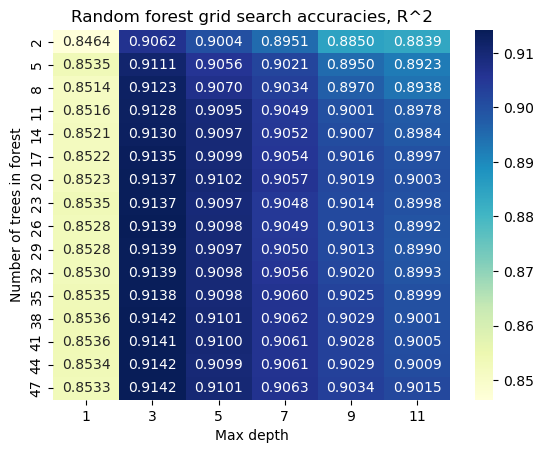

In [63]:
# To make 2D matrics of accuracy at different parameter values.
param_grid_tree = {'n_estimators': range(2,50,3), 'max_depth': range(1,12,2)}


rfr2 = RandomForestRegressor(random_state=43, min_impurity_decrease=0, max_features=3)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_train, y_train))
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)


# Create a DataFrame from the cv_results_
# results_df = pd.DataFrame(grid.cv_results_)
pivot_table = pd.pivot_table(results, values='mean_test_score', index='param_n_estimators', columns='param_max_depth')

# import seaborn as sns
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".4f")
# Add labels and title
plt.xlabel('Max depth')
plt.ylabel('Number of trees in forest')
plt.title('Random forest grid search accuracies, R^2')
plt.show()


{'max_features': 3, 'min_impurity_decrease': 0}
0.9379412849540693
0.9231414345643214
0     0.900085
1     0.900085
2     0.900085
3     0.900085
4     0.900085
5     0.900085
6     0.900085
7     0.900085
8     0.917099
9     0.917099
10    0.917099
11    0.917099
12    0.917099
13    0.917099
14    0.917099
15    0.917099
16    0.918466
17    0.918466
18    0.918466
19    0.918466
20    0.918466
21    0.918466
22    0.918466
23    0.918466
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_impurity_decrease,params,split0_test_score,split1_test_score,split2_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.150485,0.030115,0.014598,0.008549,1,0,"{'max_features': 1, 'min_impurity_decrease': 0}",0.813541,0.933788,0.926744,...,17,0.965153,0.909634,0.915322,0.921079,0.919427,0.917021,0.918788,0.923775,0.017239
1,0.179874,0.046286,0.014313,0.006283,1,5,"{'max_features': 1, 'min_impurity_decrease': 5}",0.813541,0.933788,0.926744,...,17,0.965153,0.909634,0.915322,0.921079,0.919427,0.917021,0.918788,0.923775,0.017239
2,0.186723,0.040699,0.015602,0.009320,1,10,"{'max_features': 1, 'min_impurity_decrease': 10}",0.813541,0.933788,0.926744,...,17,0.965153,0.909634,0.915322,0.921079,0.919427,0.917021,0.918788,0.923775,0.017239
3,0.147008,0.030957,0.012085,0.003111,1,15,"{'max_features': 1, 'min_impurity_decrease': 15}",0.813541,0.933788,0.926744,...,17,0.965153,0.909634,0.915322,0.921079,0.919427,0.917021,0.918788,0.923775,0.017239
4,0.185906,0.052970,0.014612,0.003904,1,20,"{'max_features': 1, 'min_impurity_decrease': 20}",0.813541,0.933788,0.926744,...,17,0.965153,0.909634,0.915322,0.921079,0.919427,0.917021,0.918788,0.923775,0.017239
5,0.164000,0.050925,0.013421,0.004127,1,25,"{'max_features': 1, 'min_impurity_decrease': 25}",0.813541,0.933788,0.926744,...,17,0.965153,0.909634,0.915322,0.921079,0.919427,0.917021,0.918788,0.923775,0.017239
6,0.190924,0.067285,0.017423,0.008382,1,30,"{'max_features': 1, 'min_impurity_decrease': 30}",0.813541,0.933788,0.926744,...,17,0.965153,0.909634,0.915322,0.921079,0.919427,0.917021,0.918788,0.923775,0.017239
7,0.139243,0.021392,0.011388,0.002002,1,35,"{'max_features': 1, 'min_impurity_decrease': 35}",0.813541,0.933788,0.926744,...,17,0.965153,0.909634,0.915322,0.921079,0.919427,0.917021,0.918788,0.923775,0.017239
8,0.179407,0.090407,0.022811,0.014764,2,0,"{'max_features': 2, 'min_impurity_decrease': 0}",0.786855,0.940349,0.945917,...,9,0.982085,0.922186,0.929250,0.935082,0.935082,0.934739,0.936588,0.939287,0.018080
9,0.228418,0.069737,0.010819,0.001923,2,5,"{'max_features': 2, 'min_impurity_decrease': 5}",0.786855,0.940349,0.945917,...,9,0.982085,0.922186,0.929250,0.935082,0.935082,0.934739,0.936588,0.939287,0.018080


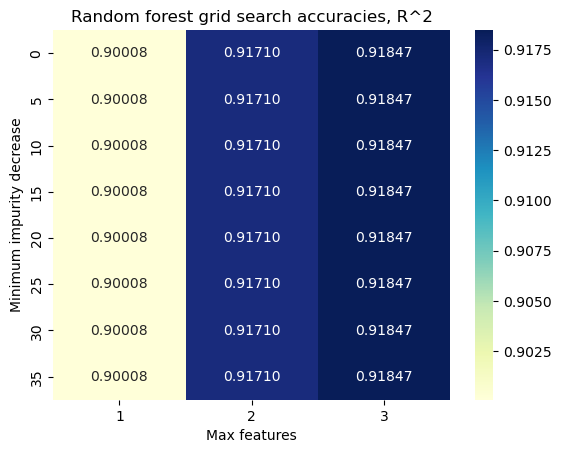

In [10]:
# To make 2D matrics of accuracy at different parameter values.
param_grid_tree = {'min_impurity_decrease': range(0,40,5), 'max_features': range(1,4,1)}

rfr2 = RandomForestRegressor(random_state=43, n_estimators=38, max_depth=3)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_train, y_train))
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)



# Create a DataFrame from the cv_results_
# results_df = pd.DataFrame(grid.cv_results_)
pivot_table = pd.pivot_table(results, values='mean_test_score', index='param_min_impurity_decrease', columns='param_max_features')

# import seaborn as sns
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".5f")
# Add labels and title
plt.xlabel('Max features')
plt.ylabel('Minimum impurity decrease')
plt.title('Random forest grid search accuracies, R^2')
plt.show()


{'n_estimators': 38}
0.9231414345643214
0     0.910805
1     0.917172
2     0.918116
3     0.918001
4     0.917594
5     0.917565
6     0.917725
7     0.917979
8     0.918415
9     0.918417
10    0.918314
11    0.918147
12    0.918466
13    0.918402
14    0.918370
15    0.918332
Name: mean_test_score, dtype: float64


c:\Users\andir\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\andir\AppData\Local\Temp\ipykernel_23520\3849256192.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_n_estimators.astype(np.int),
C:\Users\andir\AppData\Local\Temp\ipykernel_23520\3849256192.py:18: DeprecationWarning: `np.int` is a deprecat

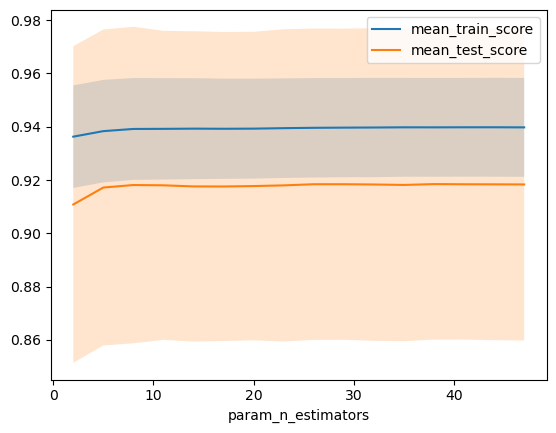

In [11]:
# GridSearchCV and plotting of parameter sweep
param_grid_tree = {'n_estimators': range(2,50,3)}
rfr2 = RandomForestRegressor(min_impurity_decrease=0, max_depth=3, max_features=3, random_state=43)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
# display(results)

results.plot('param_n_estimators', 'mean_train_score')
results.plot('param_n_estimators', 'mean_test_score', ax=plt.gca()) # Tror "validation" score, but called "test" score; like Rahman has written.
plt.fill_between(results.param_n_estimators.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_n_estimators.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()

{'max_depth': 3}
0.9231410215738759
0    0.856997
1    0.917477
2    0.912755
3    0.909269
4    0.906520
5    0.904144
Name: mean_test_score, dtype: float64


c:\Users\andir\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\andir\AppData\Local\Temp\ipykernel_23520\1054954423.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_max_depth.astype(np.int),
C:\Users\andir\AppData\Local\Temp\ipykernel_23520\1054954423.py:19: DeprecationWarning: `np.int` is a deprecated 

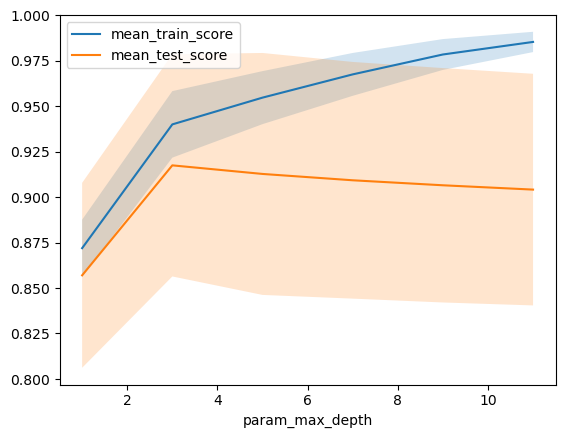

In [46]:
# GridSearchCV and plotting of parameter sweep
param_grid_tree = {'max_depth': range(1,12,2)}

rfr2 = RandomForestRegressor(n_estimators=38, min_impurity_decrease=0, max_features=3, random_state=42)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
# display(results)

results.plot('param_max_depth', 'mean_train_score')
results.plot('param_max_depth', 'mean_test_score', ax=plt.gca()) # Tror "validation" score, but called "test" score; like Rahman has written.
plt.fill_between(results.param_max_depth.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_max_depth.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()

{'min_impurity_decrease': 0}
0.9231414345643214
0    0.918466
1    0.918466
2    0.918466
3    0.918466
4    0.918466
5    0.918466
6    0.918466
7    0.918466
Name: mean_test_score, dtype: float64


c:\Users\andir\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\andir\AppData\Local\Temp\ipykernel_23520\2599753089.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_min_impurity_decrease.astype(np.int),
C:\Users\andir\AppData\Local\Temp\ipykernel_23520\2599753089.py:19: DeprecationWarning: `np.int` is a

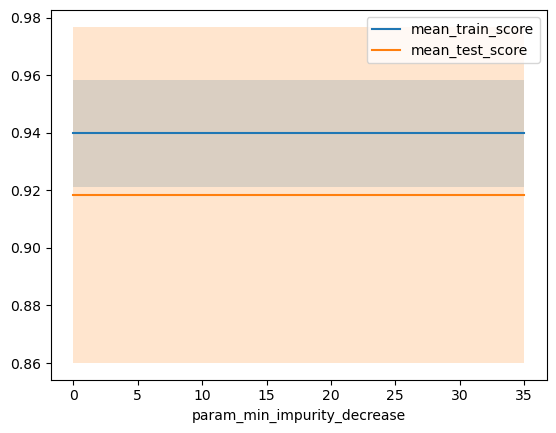

In [13]:
# GridSearchCV and plotting of parameter sweep
param_grid_tree = {'min_impurity_decrease': range(0,40,5)}

rfr2 = RandomForestRegressor(n_estimators=38, max_depth=3, max_features=3, random_state=43)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
# display(results)

results.plot('param_min_impurity_decrease', 'mean_train_score')
results.plot('param_min_impurity_decrease', 'mean_test_score', ax=plt.gca()) # Tror "validation" score, but called "test" score; like Rahman has written.
plt.fill_between(results.param_min_impurity_decrease.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_min_impurity_decrease.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()

{'max_features': 3}
0.9231414345643214
0    0.900085
1    0.917099
2    0.918466
Name: mean_test_score, dtype: float64


c:\Users\andir\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\andir\AppData\Local\Temp\ipykernel_23520\712399020.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_max_features.astype(np.int),
C:\Users\andir\AppData\Local\Temp\ipykernel_23520\712399020.py:19: DeprecationWarning: `np.int` is a deprecated

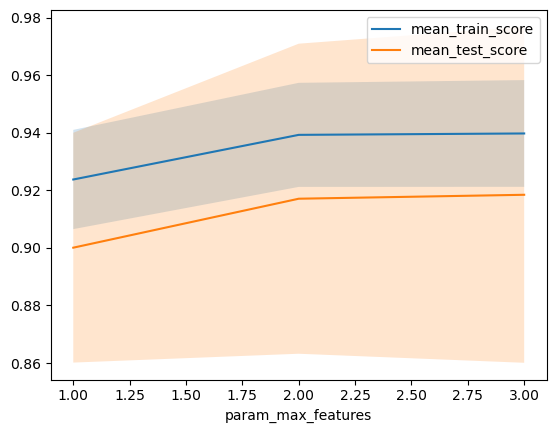

In [14]:
# GridSearchCV and plotting of parameter sweep
param_grid_tree = {'max_features': range(1,4,1)}

rfr2 = RandomForestRegressor(n_estimators=38, max_depth=3, min_impurity_decrease=0, random_state=43)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
# display(results)

results.plot('param_max_features', 'mean_train_score')
results.plot('param_max_features', 'mean_test_score', ax=plt.gca()) # Tror "validation" score, but called "test" score; like Rahman has written.
plt.fill_between(results.param_max_features.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_max_features.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()

In [15]:
# Make random forest regressor with optimal parameters
rfr2 = RandomForestRegressor(n_estimators=38, max_depth=3, min_impurity_decrease=0, max_features=3, random_state=43)

rfr2.fit(X_train,y_train)

rfr2_score = rfr2.score(X_train, y_train)
print(f"Train score is {rfr2_score*100:.4f} %")

rfr2_score = rfr2.score(X_test, y_test)
print(f"Test score is {rfr2_score*100:.4f} %")

Train score is 93.7941 %
Test score is 92.3141 %


Text(0.5, 0, 'Relative importance')

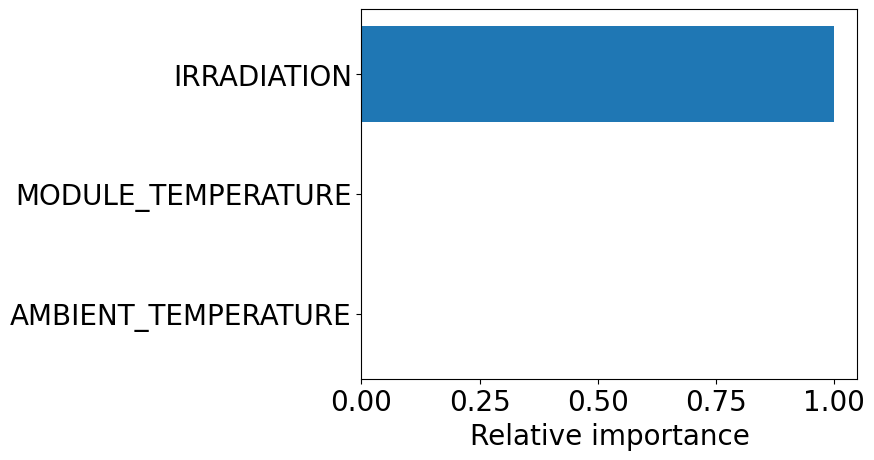

In [16]:
# Plot feature importance
feat_imp = rfr2.feature_importances_
# display(feat_imp)
plt.barh(range(3), rfr2.feature_importances_[0:3])
plt.yticks(range(3), feature_names)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel("Relative importance", fontsize=20)

In [17]:
# Make random forest regressor using all features
rfr2 = RandomForestRegressor(n_estimators=38, max_depth=3, min_impurity_decrease=0, max_features=2, random_state=43)

rfr2.fit(X_train,y_train)

rfr2_score = rfr2.score(X_train, y_train)
print(f"Train score is {rfr2_score*100:.4f} %")

rfr2_score = rfr2.score(X_test, y_test)
print(f"Test score is {rfr2_score*100:.4f} %")



Train score is 93.7507 %
Test score is 91.4522 %


Text(0.5, 0, 'Relative importance')

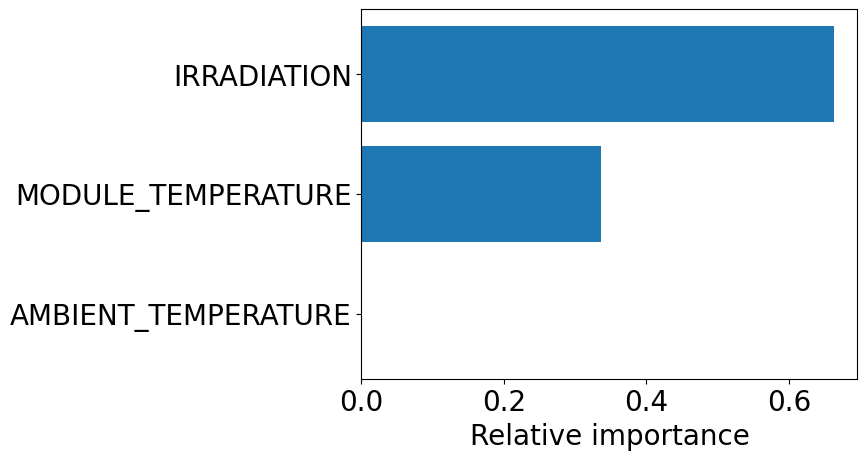

In [18]:
# Plot feature importance
feat_imp = rfr2.feature_importances_
# display(feat_imp)
plt.barh(range(3), rfr2.feature_importances_[0:3])
plt.yticks(range(3), feature_names)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel("Relative importance", fontsize=20)

Train score is 93.7941 %
Test score is 92.3141 %


(0.0, 19731.826999999997)

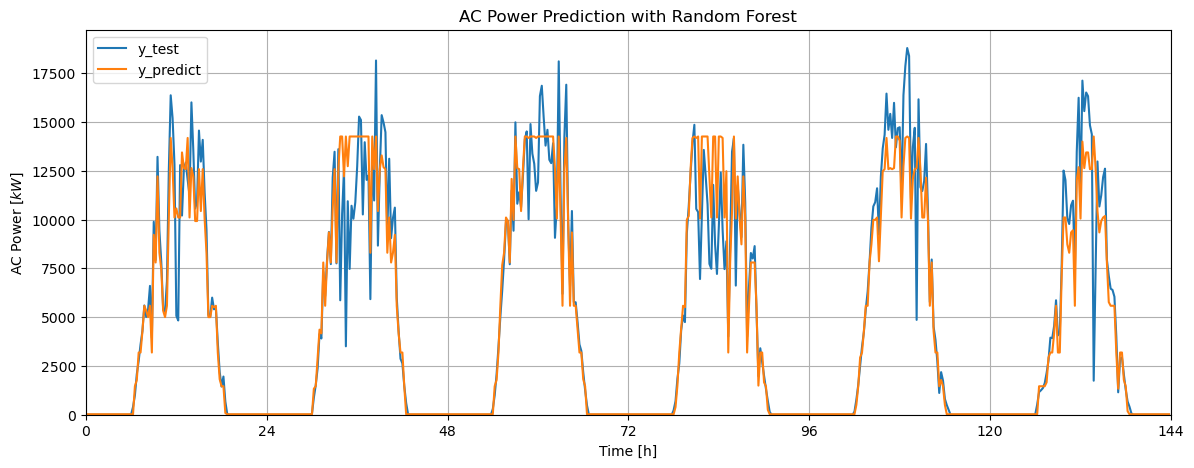

In [19]:
# Plot real and predicted AC-power for optimal Random Forest parameters.
rfr2 = RandomForestRegressor(n_estimators=38, max_depth=3, min_impurity_decrease=0, max_features=3, random_state=43)

rfr2.fit(X_train,y_train)

rfr2_score = rfr2.score(X_train, y_train)
print(f"Train score is {rfr2_score*100:.4f} %")

rfr2_score = rfr2.score(X_test, y_test)
print(f"Test score is {rfr2_score*100:.4f} %")

y_predict = rfr2.predict(X_test)


# display(y_test)
y_test_arr = y_test.to_numpy()
# display(y_test_arr)
# display(y_predict)

NN = y_test_arr.size
# print(NN)
time_step = 0.25 #  in hours
new_time_axis = np.linspace(0, NN*time_step-1*time_step, NN)
# print(new_time_axis.size)



plt.figure(figsize=(14,5))
plt.plot(new_time_axis, y_test_arr, label="y_test")
plt.plot(new_time_axis, y_predict, label="y_predict")
plt.legend()
plt.title("AC Power Prediction with Random Forest")
plt.ylabel("AC Power $[kW]$")
plt.xlabel("Time [h]")
plt.grid()
days = 6
plt.xticks(np.arange(0, 24*(days+1), step=24))  # Set label locations.
plt.xlim(24*(0), 24*(days-0))    
plt.ylim(0,max(y_test_arr)*1.05)



2606   2020-06-12 00:00:00
2607   2020-06-12 00:15:00
2608   2020-06-12 00:30:00
2609   2020-06-12 00:45:00
2610   2020-06-12 01:00:00
               ...        
3177   2020-06-17 22:45:00
3178   2020-06-17 23:00:00
3179   2020-06-17 23:15:00
3180   2020-06-17 23:30:00
3181   2020-06-17 23:45:00
Name: DATE_TIME, Length: 576, dtype: datetime64[ns]

(0.0, 19731.826999999997)

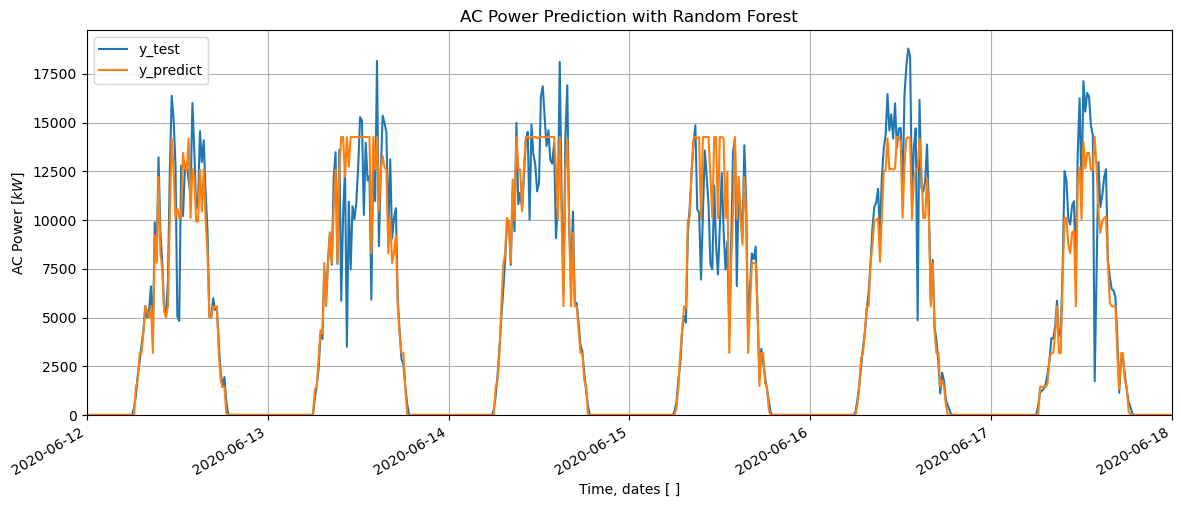

In [20]:
# Plot real and predicted AC-power for optimal Random Forest parameters. But with dates on the hrozintal axis.
plant1, plant2, weather1, weather2 = load_data() # I use Mathiases function "load_data()", since this converts "DATE_TIME" to a datetime-format.
time_dates = weather1["DATE_TIME"]
time_dates = time_dates[-NN:]
display(time_dates)


plt.figure(figsize=(14,5))
plt.plot(time_dates, y_test_arr, label="y_test")
plt.plot(time_dates, y_predict, label="y_predict")
plt.legend()
plt.title("AC Power Prediction with Random Forest")
plt.ylabel("AC Power $[kW]$")
plt.xlabel("Time, dates [ ]")
plt.grid()
plt.xticks(rotation=30, ha='right')
plt.xlim(np.datetime64('2020-06-12'),np.datetime64('2020-06-18')) 
plt.ylim(0,max(y_test_arr)*1.05)

# Code from "andi_AML.ipynb" to make figures for report. Change from plant 1 to plant 2!


Score is 92.1386 %


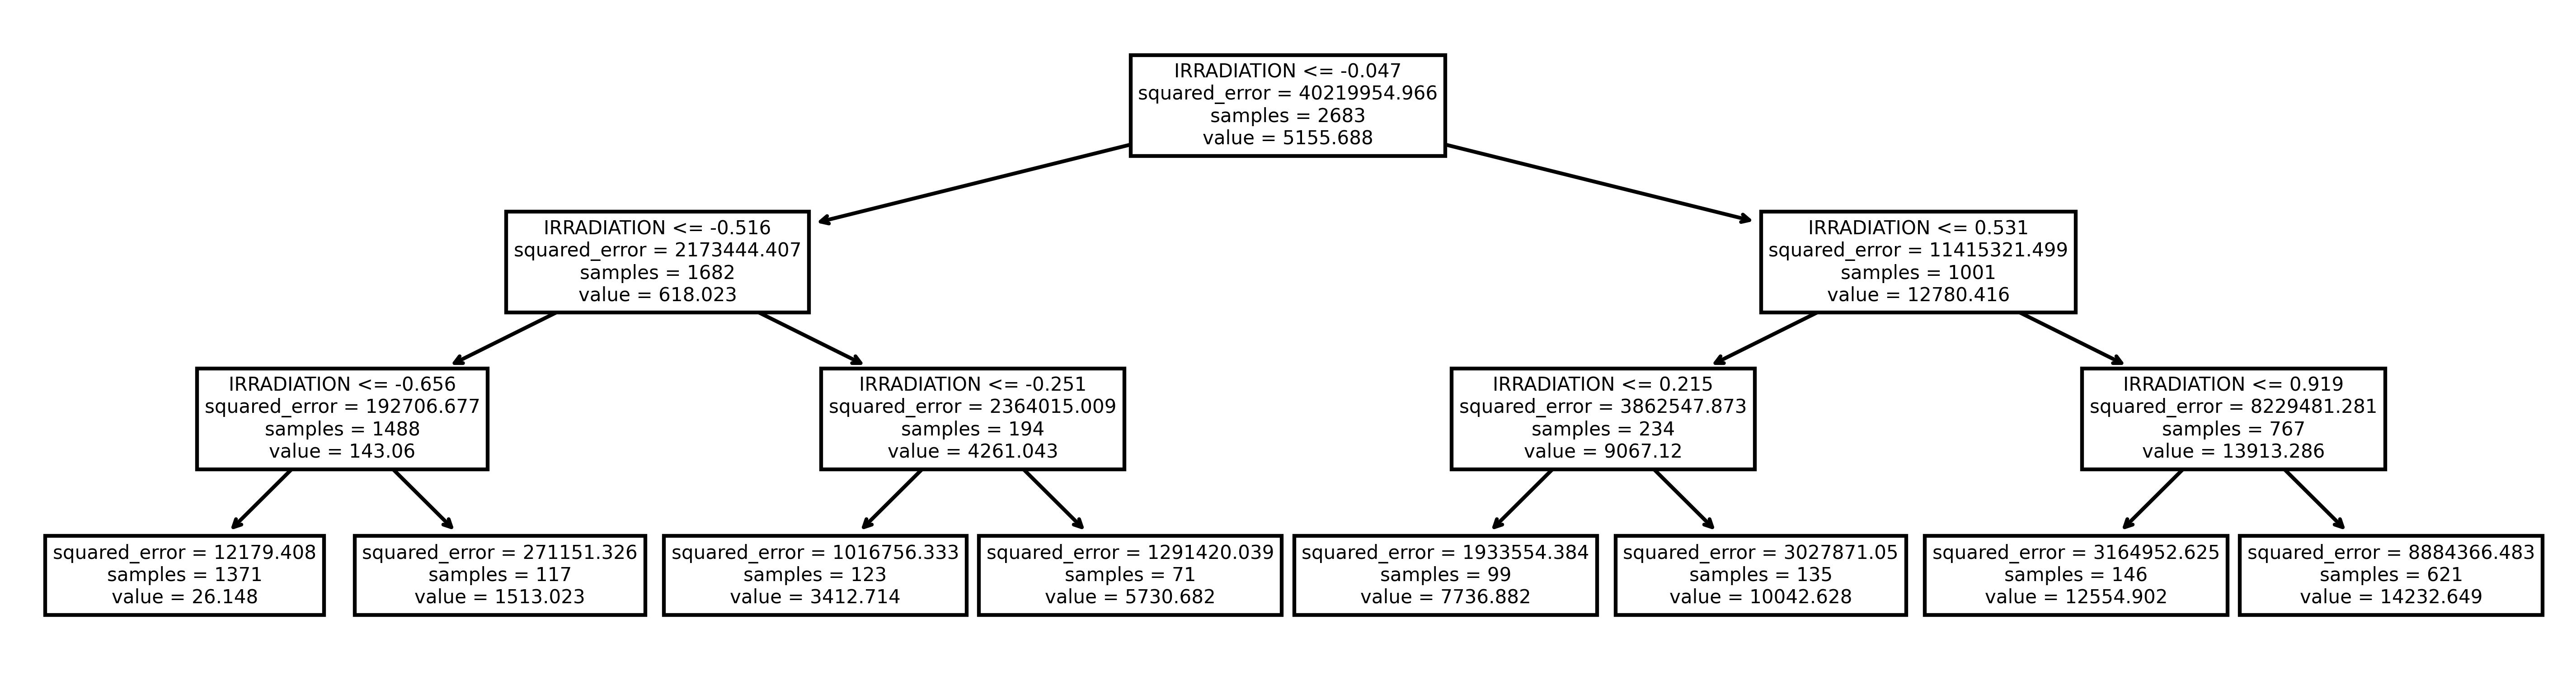

In [21]:
# Plot decision tree
dtr = DecisionTreeRegressor(max_depth=3,  random_state=43)
dtr.fit(X_train,y_train)

dtr_score = dtr.score(X_test, y_test)
print(f"Score is {dtr_score*100:.4f} %")

plt.figure(figsize=(12, 3), dpi=600)
tree_dot = plot_tree(dtr, feature_names=feature_names)

In [22]:
# Overlook of data
plant1, plant2, weather1, weather2 = load_data()

plant2.info()
print("\n ########## \n")
weather2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    67698 non-null  datetime64[ns]
 1   PLANT_ID     67698 non-null  int64         
 2   SOURCE_KEY   67698 non-null  object        
 3   DC_POWER     67698 non-null  float64       
 4   AC_POWER     67698 non-null  float64       
 5   DAILY_YIELD  67698 non-null  float64       
 6   TOTAL_YIELD  67698 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.6+ MB

 ########## 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   PLANT_ID             3259 non-null   int64         
 2   SOURCE_KEY      

In [23]:
# Overview of data
plant2_tot_data=pd.merge(plant2.drop(columns=["PLANT_ID"]), weather2.drop(columns=["PLANT_ID","SOURCE_KEY"]), on="DATE_TIME")
# plant1_tot_data['HOUR'] = pd.to_datetime(plant1_tot_data['DATE_TIME'].astype(str)).dt.hour+(pd.to_datetime(plant1_tot_data['DATE_TIME'].astype(str)).dt.minute)/60
# plant1_tot_data['MIDDAYNESS'] = abs(12-abs(plant1_tot_data['HOUR']-12)) 
    # Only maybe use MIDDAYNESS. It has better correlations with power generation than HOUR
    # Or maybe use polynomial features - preprocessing on HOURS???
display(plant2_tot_data)
display(plant2_tot_data.isnull().sum())
display(plant2_tot_data.count())
display(plant2_tot_data.describe())

# plant2_tot_data.head(30)
# display(plant2_tot_data[1000:1030])

efficiency_lis = plant2_tot_data["AC_POWER"]/plant2_tot_data["DC_POWER"]
# display(efficiency_lis[1000:1030])
print(efficiency_lis.mean())


,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0
1,2020-05-15 00:00:00,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0
2,2020-05-15 00:00:00,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0
3,2020-05-15 00:00:00,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0
4,2020-05-15 00:00:00,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0
...,...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05,23.202871,22.535908,0.0
67694,2020-06-17 23:45:00,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08,23.202871,22.535908,0.0
67695,2020-06-17 23:45:00,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06,23.202871,22.535908,0.0
67696,2020-06-17 23:45:00,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08,23.202871,22.535908,0.0


DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

DATE_TIME              67698
SOURCE_KEY             67698
DC_POWER               67698
AC_POWER               67698
DAILY_YIELD            67698
TOTAL_YIELD            67698
AMBIENT_TEMPERATURE    67698
MODULE_TEMPERATURE     67698
IRRADIATION            67698
dtype: int64

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,67698.000000,67698.000000,67698.000000,6.769800e+04,67698.000000,67698.000000,67698.000000
mean,246.701961,241.277825,3294.890295,6.589448e+08,27.986756,32.607233,0.229204
std,370.569597,362.112118,2919.448386,7.296678e+08,4.021294,11.226446,0.309365
min,0.000000,0.000000,0.000000,0.000000e+00,20.942385,20.265123,0.000000
25%,0.000000,0.000000,272.750000,1.996494e+07,24.570349,23.685627,0.000000
50%,0.000000,0.000000,2911.000000,2.826276e+08,26.910352,27.433723,0.018554
75%,446.591667,438.215000,5534.000000,1.348495e+09,30.912601,40.019036,0.431027
max,1420.933333,1385.420000,9873.000000,2.247916e+09,39.181638,66.635953,1.098766


0.9768063442756146


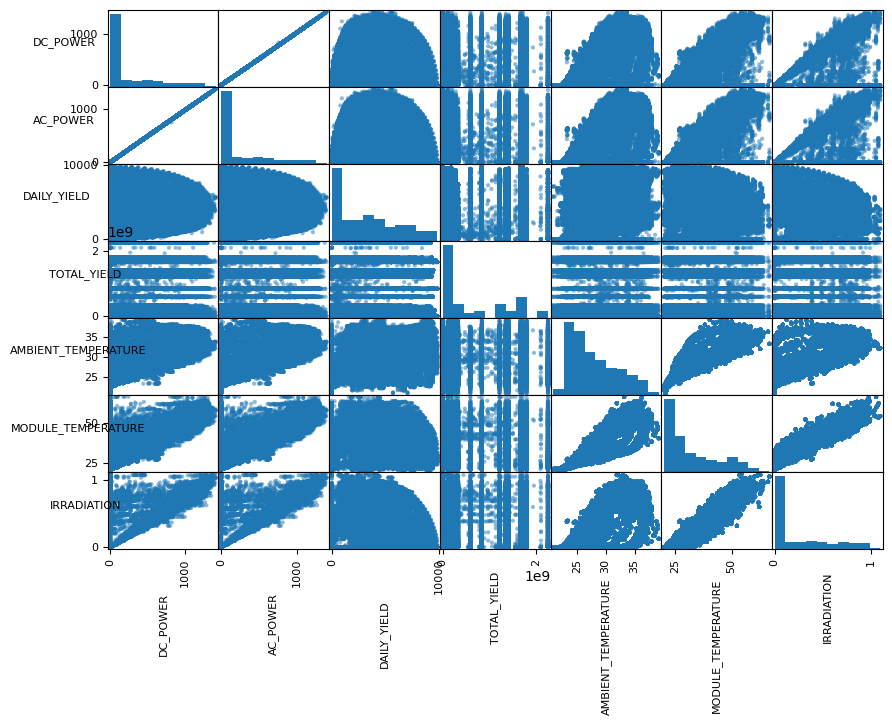

In [24]:
# Make scatter plot
axes = pd.plotting.scatter_matrix(plant2_tot_data, figsize=(10,7))
[ax.set_xlabel(ax.get_xlabel(), fontsize = 8, rotation = 90) for ax in axes.ravel()]
[ax.set_ylabel(ax.get_ylabel(), fontsize = 8, rotation = 0) for ax in axes.ravel()]
plt.show()


C:\Users\andir\AppData\Local\Temp\ipykernel_23520\2152178292.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(plant2_tot_data.drop(columns=["SOURCE_KEY"]).columns, rotation=90, fontsize=10)
C:\Users\andir\AppData\Local\Temp\ipykernel_23520\2152178292.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(plant2_tot_data.drop(columns=["SOURCE_KEY"]).columns, fontsize=10)


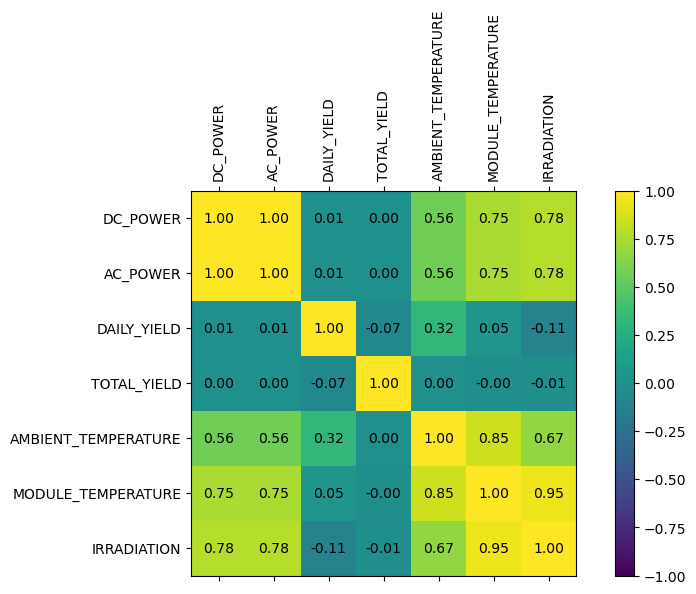

C:\Users\andir\AppData\Local\Temp\ipykernel_23520\2152178292.py:18: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DC_POWER,1.00,1.00,0.01,0.00,0.56,0.75,0.78
AC_POWER,1.00,1.00,0.01,0.00,0.56,0.75,0.78
DAILY_YIELD,0.01,0.01,1.00,-0.07,0.32,0.05,-0.11
TOTAL_YIELD,0.00,0.00,-0.07,1.00,0.00,-0.00,-0.01
AMBIENT_TEMPERATURE,0.56,0.56,0.32,0.00,1.00,0.85,0.67
MODULE_TEMPERATURE,0.75,0.75,0.05,-0.00,0.85,1.00,0.95
IRRADIATION,0.78,0.78,-0.11,-0.01,0.67,0.95,1.00


In [25]:
# Make correlation matrix
correlations = plant2_tot_data.corr()
# plot correlation matrix 
    # Made this way, underneath, to get more option, like colorbar. -Andi
fig = plt.figure(figsize=(10, 5)) # Create empty figure.
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ax.set_xticklabels(plant2_tot_data.drop(columns=["SOURCE_KEY"]).columns, rotation=90, fontsize=10)
ax.set_yticklabels(plant2_tot_data.drop(columns=["SOURCE_KEY"]).columns, fontsize=10)
# Note that the column "SOURCE_KEY" is automatically obmitted, since it is not numerical values.
for (i, j), z in np.ndenumerate(correlations):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')#,
            #bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.show()

# Or just use:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


# Plant 1 data overview

In [37]:
# Select features and scale data. 
plant1_tot_data=pd.merge(plant1.drop(columns=["PLANT_ID"]), weather1.drop(columns=["PLANT_ID","SOURCE_KEY"]), on="DATE_TIME")

feature_names=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
# feature_names=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'HOUR']
# feature_names=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'MIDDAYNESS']
X = plant1_tot_data[feature_names]
y = plant1_tot_data['AC_POWER']


# Just to write out nice table for example data
# display(X)
Xy=pd.concat([X, y], axis=1)
display(Xy[1000:1015])
display(X[1000:1015])
display(y[1000:1015])


from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=6/34, shuffle=False)


#Making scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#Fitting scaler to the data
scaler.fit(X_test)

#Transform the data to normal distributions
X_test=pd.DataFrame(scaler.transform(X_test))
X_train=pd.DataFrame(scaler.transform(X_train))

display(X_test)

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,AC_POWER
1000,30.287073,49.841364,0.557069,676.071429
1001,30.287073,49.841364,0.557069,712.775000
1002,30.287073,49.841364,0.557069,790.200000
1003,30.287073,49.841364,0.557069,719.062500
1004,30.287073,49.841364,0.557069,690.757143
1005,30.287073,49.841364,0.557069,568.571429
1006,30.287073,49.841364,0.557069,757.571429
1007,30.287073,49.841364,0.557069,752.642857
1008,30.287073,49.841364,0.557069,656.571429
1009,30.287073,49.841364,0.557069,682.442857


,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1000,30.287073,49.841364,0.557069
1001,30.287073,49.841364,0.557069
1002,30.287073,49.841364,0.557069
1003,30.287073,49.841364,0.557069
1004,30.287073,49.841364,0.557069
1005,30.287073,49.841364,0.557069
1006,30.287073,49.841364,0.557069
1007,30.287073,49.841364,0.557069
1008,30.287073,49.841364,0.557069
1009,30.287073,49.841364,0.557069


1000    676.071429
1001    712.775000
1002    790.200000
1003    719.062500
1004    690.757143
1005    568.571429
1006    757.571429
1007    752.642857
1008    656.571429
1009    682.442857
1010    593.814286
1011    547.400000
1012    704.114286
1013    646.214286
1014    920.042857
Name: AC_POWER, dtype: float64

,0,1,2
0,-1.59862,-0.969697,-0.777375
1,-1.59862,-0.969697,-0.777375
2,-1.59862,-0.969697,-0.777375
3,-1.59862,-0.969697,-0.777375
4,-1.59862,-0.969697,-0.777375
...,...,...,...
12132,-1.16262,-0.916016,-0.777375
12133,-1.16262,-0.916016,-0.777375
12134,-1.16262,-0.916016,-0.777375
12135,-1.16262,-0.916016,-0.777375


In [38]:



tscv = TimeSeriesSplit(n_splits=7)




param_grid_tree = {'n_estimators': range(2,50,3), 'max_depth': range(1,12,2), 'min_impurity_decrease': range(0,40,5), 'max_features': range(1,4,1)}


# from sklearn.model_selection import RandomizedSearchCV
rfr2 = RandomForestRegressor(random_state=43)
gridrand = RandomizedSearchCV(rfr2, param_distributions=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1) #, random_state=42
gridrand.fit(X_train, y_train)
print(gridrand.best_params_)
print(gridrand.score(X_train, y_train))
print(gridrand.score(X_test, y_test))

resultsrand = pd.DataFrame(gridrand.cv_results_)
print(resultsrand.loc[:,'mean_test_score'])
display(resultsrand)


{'n_estimators': 17, 'min_impurity_decrease': 5, 'max_features': 3, 'max_depth': 5}
0.9833143857328117
0.9774553601501491
0    0.974496
1    0.979875
2    0.974269
3    0.980288
4    0.980857
5    0.971381
6    0.837127
7    0.971663
8    0.949490
9    0.980191
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_impurity_decrease,param_max_features,param_max_depth,params,split0_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.293189,0.182013,0.021931,0.020476,11,10,1,11,"{'n_estimators': 11, 'min_impurity_decrease': ...",0.979962,...,5,0.988857,0.990241,0.990021,0.989201,0.987863,0.987733,0.982123,0.988006,0.002561
1,0.879592,0.619912,0.017224,0.005860,23,5,2,9,"{'n_estimators': 23, 'min_impurity_decrease': ...",0.984942,...,4,0.989485,0.991037,0.991134,0.990289,0.989482,0.989601,0.984866,0.989413,0.001967
2,0.897170,0.442602,0.018366,0.004432,29,10,3,3,"{'n_estimators': 29, 'min_impurity_decrease': ...",0.974079,...,6,0.979368,0.980983,0.984536,0.982952,0.981515,0.980757,0.975585,0.980814,0.002629
3,0.165261,0.136841,0.005706,0.001360,2,15,3,7,"{'n_estimators': 2, 'min_impurity_decrease': 1...",0.986448,...,2,0.987990,0.989461,0.989760,0.988854,0.987894,0.987784,0.982596,0.987763,0.002231
4,0.779344,0.471481,0.013602,0.001901,17,5,3,5,"{'n_estimators': 17, 'min_impurity_decrease': ...",0.987048,...,1,0.988150,0.989136,0.989659,0.988911,0.987648,0.988032,0.982578,0.987730,0.002201
5,0.548875,0.270623,0.019307,0.006308,23,35,1,11,"{'n_estimators': 23, 'min_impurity_decrease': ...",0.973362,...,8,0.987077,0.988429,0.987409,0.986506,0.984298,0.985425,0.978436,0.985369,0.003093
6,0.078042,0.037582,0.008299,0.003197,5,5,2,1,"{'n_estimators': 5, 'min_impurity_decrease': 5...",0.831640,...,10,0.853596,0.851225,0.859331,0.860683,0.854907,0.854488,0.845546,0.854254,0.004675
7,0.605871,0.301750,0.019433,0.004780,35,30,1,7,"{'n_estimators': 35, 'min_impurity_decrease': ...",0.971916,...,7,0.986963,0.987947,0.987149,0.986298,0.984691,0.985347,0.978682,0.985297,0.002887
8,0.068093,0.041585,0.005112,0.001065,2,10,2,3,"{'n_estimators': 2, 'min_impurity_decrease': 1...",0.942926,...,9,0.956368,0.960020,0.967422,0.965986,0.964634,0.962148,0.956278,0.961837,0.004148
9,0.658445,0.265750,0.012190,0.004018,26,35,3,9,"{'n_estimators': 26, 'min_impurity_decrease': ...",0.986732,...,3,0.987445,0.988716,0.989174,0.988398,0.986991,0.987214,0.981889,0.987118,0.002264


Train score is 98.3634 %
Test score is 97.7306 %


Text(0.5, 0, 'Relative importance')

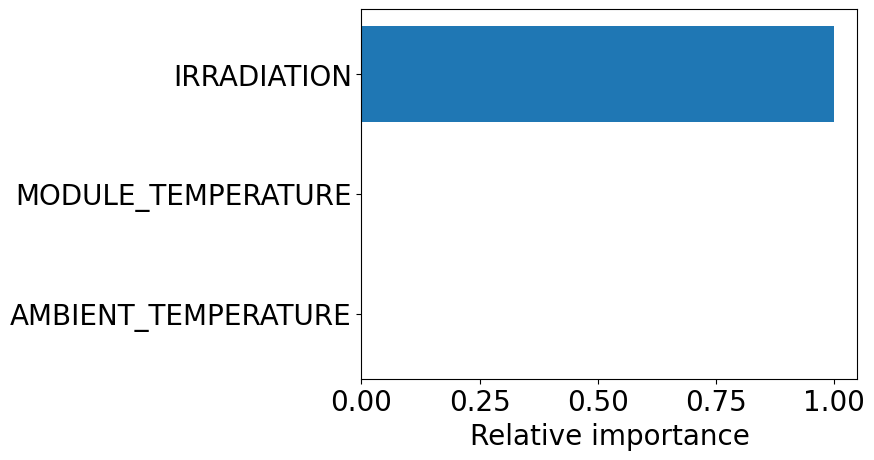

In [39]:
rfr2 = RandomForestRegressor(n_estimators=47, min_impurity_decrease=15, max_features=3, max_depth=11, random_state=43)

rfr2.fit(X_train,y_train)

rfr2_score = rfr2.score(X_train, y_train)
print(f"Train score is {rfr2_score*100:.4f} %")

rfr2_score = rfr2.score(X_test, y_test)
print(f"Test score is {rfr2_score*100:.4f} %")


feat_imp = rfr2.feature_importances_
# display(feat_imp)
plt.barh(range(3), rfr2.feature_importances_[0:3])
plt.yticks(range(3), feature_names)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel("Relative importance", fontsize=20)